In [ ]:
import pandas as pd
from tqdm import tqdm
from cmehr.dataset.mimic4_datamodule import MIMIC4DataModule
from cmehr.paths import *

In [ ]:
mimic4_datamodule = MIMIC4DataModule(
    file_path="/home/fywang/Documents/CM-EHR/output_mimic4/ihm",
    mimic_cxr_dir=MIMIC_CXR_JPG_PATH,
    tt_max=48,
    batch_size=256,
    num_workers=4
)

In [ ]:
all_labels = []

for batch in tqdm(mimic4_datamodule.train_dataloader()):
    all_labels.append(batch['label'])

In [ ]:
import torch

labels = torch.cat(all_labels, dim=0)

In [ ]:
labels.float().sum()

In [ ]:
len(labels) - labels.float().sum()

In [2]:
import pickle

In [3]:
pkl_file = "/home/fywang/Documents/EHR_codebase/MMMSPG/output_mimic4/TS_CXR/ihm/train_p2x_data.pkl"
with open(pkl_file, 'rb') as f:
    data = pickle.load(f)

In [10]:
# data[0].keys()
cxr_num = []
for sample in data:
    cxr_num.append(len(sample['cxr_time']))

/tmp/ipykernel_3887528/3784096280.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cxr_num)


<Axes: ylabel='Density'>

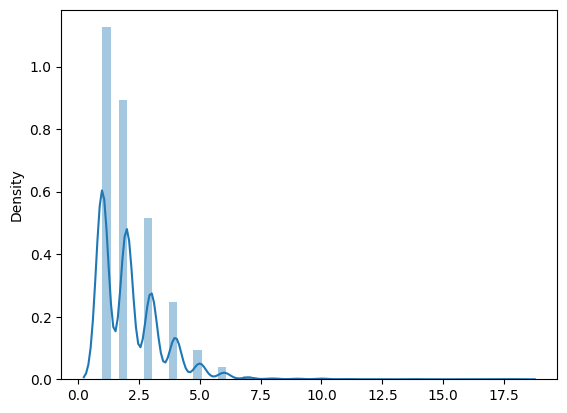

In [12]:
import seaborn as sns
sns.distplot(cxr_num)

In [15]:
import pandas as pd
import numpy as np
pd.DataFrame(cxr_num).describe()

,0
count,4301.000000
mean,2.168798
std,1.345747
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,18.000000


In [16]:
np.percentile(cxr_num, 95)

5.0